In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class ImplicitFunctionNetwork(nn.Module):
    def __init__(self):
        super(ImplicitFunctionNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
def generate_training_data(radius, num_samples):
    # Sample points inside and outside the circle
    angles = np.linspace(0, 2 * np.pi, num_samples)
    x = radius * np.cos(angles) + 0.1 * np.random.randn(num_samples)
    y = radius * np.sin(angles) + 0.1 * np.random.randn(num_samples)

    inside_points = np.vstack([x, y]).T
    outside_points = np.random.uniform(-1.5 * radius, 1.5 * radius, (num_samples, 2))

    points = np.vstack([inside_points, outside_points])
    labels = np.hstack([np.ones(num_samples), -np.ones(num_samples)])

    return points, labels

radius = 1.0
num_samples = 1000
points, labels = generate_training_data(radius, num_samples)

# Convert to PyTorch tensors
points = torch.FloatTensor(points)
labels = torch.FloatTensor(labels).unsqueeze(1)


In [ ]:
model = ImplicitFunctionNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(points)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [500/50000], Loss: 0.4939
Epoch [1000/50000], Loss: 0.4635
Epoch [1500/50000], Loss: 0.4570
Epoch [2000/50000], Loss: 0.4537
Epoch [2500/50000], Loss: 0.4509
Epoch [3000/50000], Loss: 0.4488
Epoch [3500/50000], Loss: 0.4468
Epoch [4000/50000], Loss: 0.4449
Epoch [4500/50000], Loss: 0.4435
Epoch [5000/50000], Loss: 0.4419
Epoch [5500/50000], Loss: 0.4388
Epoch [6000/50000], Loss: 0.4371
Epoch [6500/50000], Loss: 0.4356
Epoch [7000/50000], Loss: 0.4342
Epoch [7500/50000], Loss: 0.4326
Epoch [8000/50000], Loss: 0.4311
Epoch [8500/50000], Loss: 0.4289
Epoch [9000/50000], Loss: 0.4272
Epoch [9500/50000], Loss: 0.4259
Epoch [10000/50000], Loss: 0.4251
Epoch [10500/50000], Loss: 0.4240
Epoch [11000/50000], Loss: 0.4227
Epoch [11500/50000], Loss: 0.4205
Epoch [12000/50000], Loss: 0.4187
Epoch [12500/50000], Loss: 0.4185
Epoch [13000/50000], Loss: 0.4174
Epoch [13500/50000], Loss: 0.4163
Epoch [14000/50000], Loss: 0.4155
Epoch [14500/50000], Loss: 0.4152
Epoch [15000/50000], Loss: 0.4143


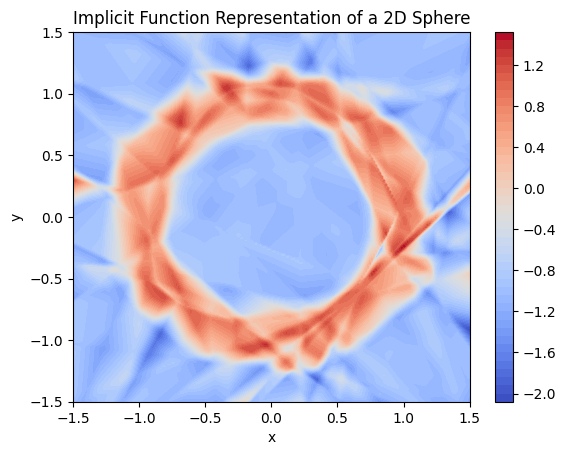

In [ ]:
# Generate a grid of points to evaluate the implicit function
grid_size = 200
x = np.linspace(-1.5 * radius, 1.5 * radius, grid_size)
y = np.linspace(-1.5 * radius, 1.5 * radius, grid_size)
xx, yy = np.meshgrid(x, y)
grid_points = np.vstack([xx.ravel(), yy.ravel()]).T
grid_points = torch.FloatTensor(grid_points)

with torch.no_grad():
    values = model(grid_points).numpy().reshape(grid_size, grid_size)

plt.contourf(xx, yy, values, levels=50, cmap='coolwarm')
plt.colorbar()
plt.title('Implicit Function Representation of a 2D Sphere')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the radius and number of sample points
radius = 1.0
num_samples = 100

# Generate points on the circle
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T

# Calculate the gradient and tangent vectors
gradients = 2 * circle_points
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# Normalize the tangent vectors for better visualization
tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# Scale tangent vectors for visualization
scale = 0.1
tangent_vectors *= scale


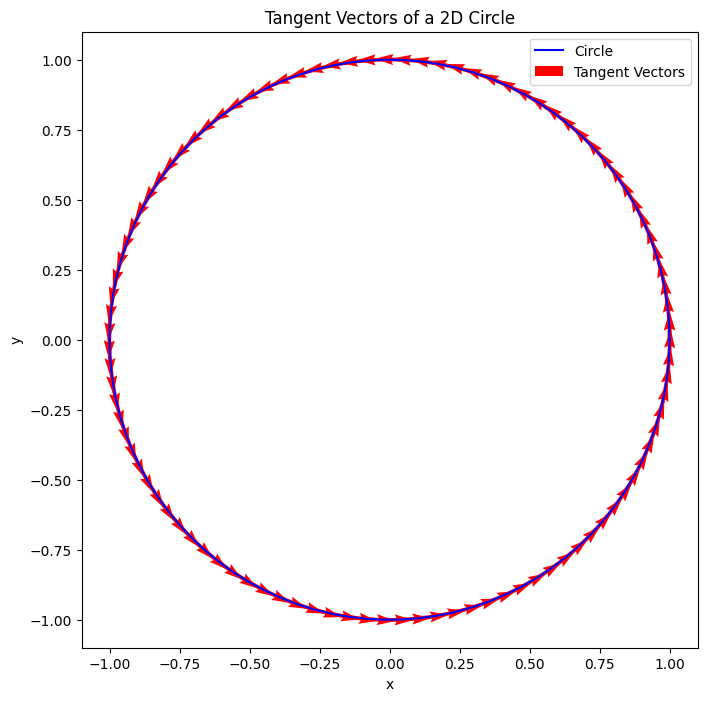

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Circle')
plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
           color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tangent Vectors of a 2D Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
# Generate points on the inferred circle
num_samples = 100
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T
circle_points_tensor = torch.FloatTensor(circle_points).requires_grad_(True)

# Compute gradients (normal vectors) using autograd
model.eval()
outputs = model(circle_points_tensor)
gradients = torch.autograd.grad(outputs, circle_points_tensor, grad_outputs=torch.ones_like(outputs), create_graph=True)[0].detach().numpy()

# Calculate tangent vectors from gradients
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# Normalize tangent vectors for better visualization
tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# Scale tangent vectors for visualization
scale = 0.1
tangent_vectors *= scale


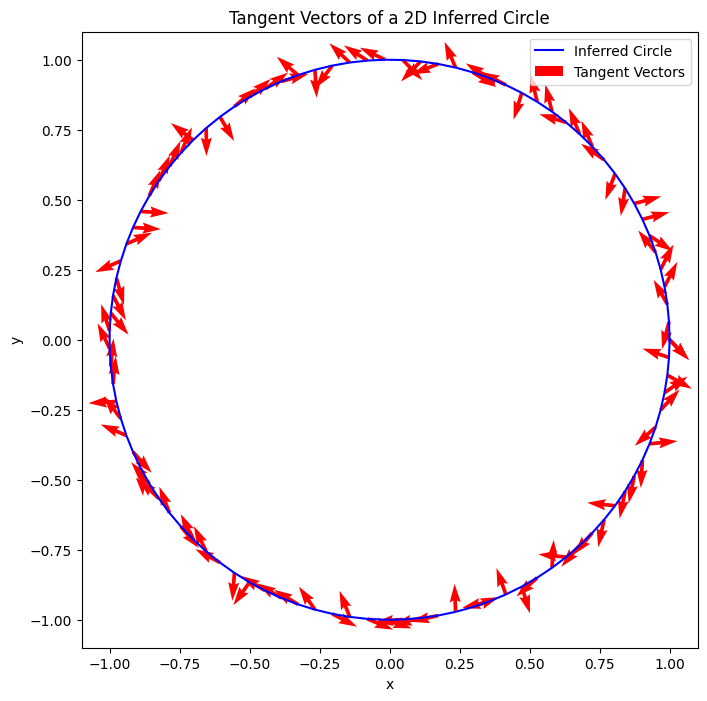

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Inferred Circle')
plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
           color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tangent Vectors of a 2D Inferred Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class ImplicitFunctionNetwork(nn.Module):
    def __init__(self):
        super(ImplicitFunctionNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
def generate_training_data(radius, num_samples):
    angles = np.linspace(0, 2 * np.pi, num_samples)
    x = radius * np.cos(angles) + 0.1 * np.random.randn(num_samples)
    y = radius * np.sin(angles) + 0.1 * np.random.randn(num_samples)

    inside_points = np.vstack([x, y]).T
    outside_points = np.random.uniform(-1.5 * radius, 1.5 * radius, (num_samples, 2))

    points = np.vstack([inside_points, outside_points])
    labels = np.hstack([np.ones(num_samples), -np.ones(num_samples)])

    return points, labels

radius = 1.0
num_samples = 1000
points, labels = generate_training_data(radius, num_samples)

points = torch.FloatTensor(points)
labels = torch.FloatTensor(labels).unsqueeze(1)

model = ImplicitFunctionNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(points)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [500/5000], Loss: 0.4942
Epoch [1000/5000], Loss: 0.4580
Epoch [1500/5000], Loss: 0.4472
Epoch [2000/5000], Loss: 0.4414
Epoch [2500/5000], Loss: 0.4373
Epoch [3000/5000], Loss: 0.4341
Epoch [3500/5000], Loss: 0.4315
Epoch [4000/5000], Loss: 0.4292
Epoch [4500/5000], Loss: 0.4271
Epoch [5000/5000], Loss: 0.4249


In [ ]:
# Generate points on the inferred circle
num_samples = 100
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T
circle_points_tensor = torch.FloatTensor(circle_points).requires_grad_(True)

# Compute gradients (normal vectors) using autograd
model.eval()
outputs = model(circle_points_tensor)
gradients = torch.autograd.grad(outputs, circle_points_tensor, grad_outputs=torch.ones_like(outputs), create_graph=True)[0].detach().numpy()

# Calculate tangent vectors from gradients
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# Normalize tangent vectors for better visualization
tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# Scale tangent vectors for visualization
scale = 0.1
tangent_vectors *= scale


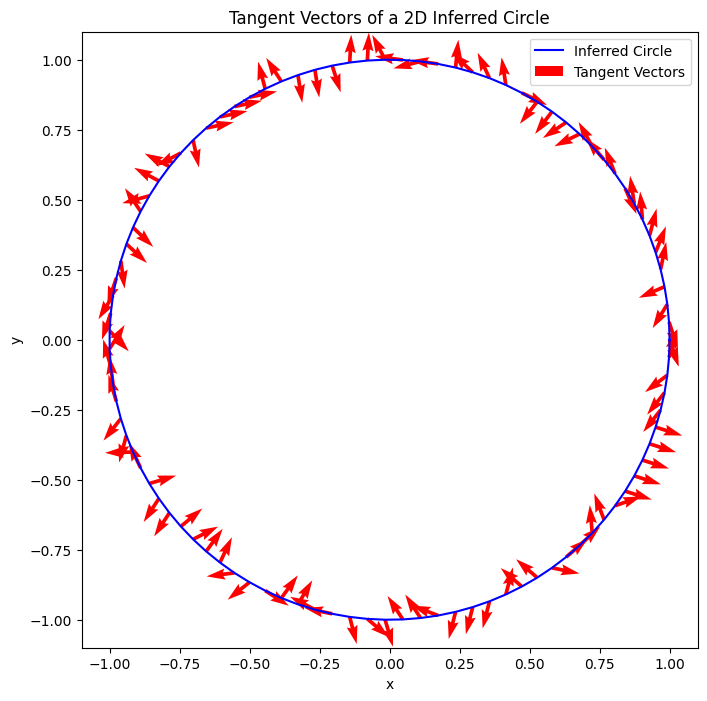

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Inferred Circle')
plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
           color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tangent Vectors of a 2D Inferred Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
!pip install torchdiffeq

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchdiffeq import odeint

# Define the neural ODE model
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, t, x):
        return self.net(x)

class ODEBlock(nn.Module):
    def __init__(self, odefunc):
        super(ODEBlock, self).__init__()
        self.odefunc = odefunc

    def forward(self, x, t_span):
        return odeint(self.odefunc, x, t_span)

# Generate training data
def generate_training_data(radius, num_samples):
    angles = np.linspace(0, 2 * np.pi, num_samples)
    x = radius * np.cos(angles) + 0.1 * np.random.randn(num_samples)
    y = radius * np.sin(angles) + 0.1 * np.random.randn(num_samples)

    inside_points = np.vstack([x, y]).T
    outside_points = np.random.uniform(-1.5 * radius, 1.5 * radius, (num_samples, 2))

    points = np.vstack([inside_points, outside_points])
    labels = np.hstack([np.ones(num_samples), -np.ones(num_samples)])

    return points, labels

radius = 1.0
num_samples = 1000
points, labels = generate_training_data(radius, num_samples)

points = torch.FloatTensor(points)
labels = torch.FloatTensor(labels).unsqueeze(1)

# Define the model and optimizer
odefunc = ODEFunc()
model = ODEBlock(odefunc)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(points, torch.tensor([0.0, 1.0]))
    loss = criterion(outputs[-1], labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2000, 1])) that is different to the input size (torch.Size([2000, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [500/5000], Loss: 0.6163


KeyboardInterrupt: 

In [ ]:
# Generate points on the inferred circle
num_samples = 100
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T
circle_points_tensor = torch.FloatTensor(circle_points).requires_grad_(True)

# Compute gradients (normal vectors) using autograd
model.eval()
outputs = model(circle_points_tensor, torch.tensor([0.0, 1.0]))
gradients = torch.autograd.grad(outputs[-1], circle_points_tensor, grad_outputs=torch.ones_like(outputs[-1]), create_graph=True)[0].detach().numpy()

# Calculate tangent vectors from gradients
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# Normalize tangent vectors for better visualization
tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# Scale tangent vectors for visualization
scale = 0.1
tangent_vectors *= scale


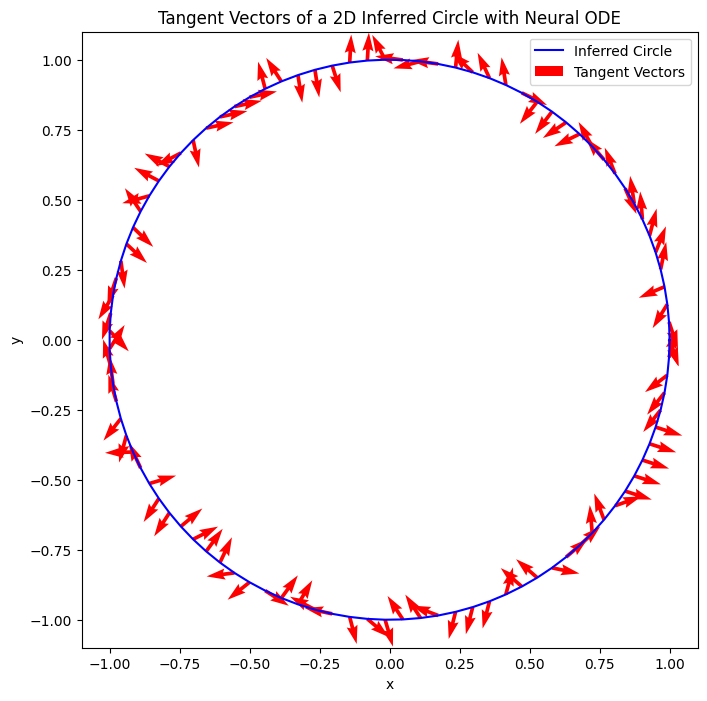

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Inferred Circle')
plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
           color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tangent Vectors of a 2D Inferred Circle with Neural ODE')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network to approximate the implicit function
class ImplicitFunctionNetwork(nn.Module):
    def __init__(self):
        super(ImplicitFunctionNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate training data
def generate_training_data(radius, num_samples):
    angles = np.linspace(0, 2 * np.pi, num_samples)
    x = radius * np.cos(angles) + 0.1 * np.random.randn(num_samples)
    y = radius * np.sin(angles) + 0.1 * np.random.randn(num_samples)

    inside_points = np.vstack([x, y]).T
    outside_points = np.random.uniform(-1.5 * radius, 1.5 * radius, (num_samples, 2))

    points = np.vstack([inside_points, outside_points])
    labels = np.hstack([np.ones(num_samples), -np.ones(num_samples)])

    return points, labels

radius = 1.0
num_samples = 1000
points, labels = generate_training_data(radius, num_samples)

points = torch.FloatTensor(points)
labels = torch.FloatTensor(labels).unsqueeze(1)

model = ImplicitFunctionNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(points)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [500/5000], Loss: 0.4963
Epoch [1000/5000], Loss: 0.4514
Epoch [1500/5000], Loss: 0.4423
Epoch [2000/5000], Loss: 0.4378
Epoch [2500/5000], Loss: 0.4346
Epoch [3000/5000], Loss: 0.4321
Epoch [3500/5000], Loss: 0.4297
Epoch [4000/5000], Loss: 0.4281
Epoch [4500/5000], Loss: 0.4260
Epoch [5000/5000], Loss: 0.4245


In [ ]:
# Define functions g_i(x, v) = t_i(x) * v
def g_i(x, v, i):
    return x[i] * v[i]

# Compute the partial derivatives of g_i with respect to x and v
def compute_LM(x, v, model):
    # Calculate ∂f/∂x
    f_x = model(x,torch.tensor([0.0, 1.0]))
    grad_f = torch.autograd.grad(f_x, x, create_graph=True)[0]

    L_M = []
    for i in range(len(x)):
        g_i_x_v = g_i(x, v, i)
        grad_g_x = torch.autograd.grad(g_i_x_v, x, create_graph=True, retain_graph=True)[0]
        grad_g_v = torch.autograd.grad(g_i_x_v, v, create_graph=True, retain_graph=True)[0]

        # Compute the difference ∂g_i/∂x - ∂g_i/∂v
        grad_diff = grad_g_x - grad_g_v
        L_M.append(grad_diff)

    L_M = torch.stack(L_M)
    return L_M

# Define the objective function for optimization
def objective(params, model):
    x = torch.tensor(params[:2], requires_grad=True, dtype=torch.float32)
    v = torch.tensor(params[2:], requires_grad=True, dtype=torch.float32)
    L_M = compute_LM(x, v, model)
    determinant = torch.det(L_M)
    return torch.abs(determinant)

# Use a gradient-based optimizer to minimize the determinant
from scipy.optimize import minimize

# Initial guess for x and v
initial_guess = np.random.randn(4)

# Optimize the objective function
result = minimize(lambda params: objective(params, model).item(), initial_guess, method='BFGS')

# Extract the optimal x and v
x_optimal = result.x[:2]
v_optimal = result.x[2:]

print(f'Optimal x: {x_optimal}')
print(f'Optimal v: {v_optimal}')


TypeError: ImplicitFunctionNetwork.forward() takes 2 positional arguments but 3 were given

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network to approximate the implicit function
class ImplicitFunctionNetwork(nn.Module):
    def __init__(self):
        super(ImplicitFunctionNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Generate training data
def generate_training_data(radius, num_samples):
    angles = np.linspace(0, 2 * np.pi, num_samples)
    x = radius * np.cos(angles) + 0.1 * np.random.randn(num_samples)
    y = radius * np.sin(angles) + 0.1 * np.random.randn(num_samples)

    inside_points = np.vstack([x, y]).T
    outside_points = np.random.uniform(-1.5 * radius, 1.5 * radius, (num_samples, 2))

    points = np.vstack([inside_points, outside_points])
    labels = np.hstack([np.ones(num_samples), -np.ones(num_samples)])

    return points, labels

radius = 1.0
num_samples = 2000
points, labels = generate_training_data(radius, num_samples)

points = torch.FloatTensor(points).to('cuda')
labels = torch.FloatTensor(labels).unsqueeze(1).to('cuda')

model = ImplicitFunctionNetwork()
model.to('cuda')
criterion = nn.MSELoss()
criterion.to('cuda')
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(points)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [500/50000], Loss: 0.5025
Epoch [1000/50000], Loss: 0.4788
Epoch [1500/50000], Loss: 0.4743
Epoch [2000/50000], Loss: 0.4717
Epoch [2500/50000], Loss: 0.4696
Epoch [3000/50000], Loss: 0.4680
Epoch [3500/50000], Loss: 0.4665
Epoch [4000/50000], Loss: 0.4650
Epoch [4500/50000], Loss: 0.4639
Epoch [5000/50000], Loss: 0.4628
Epoch [5500/50000], Loss: 0.4617
Epoch [6000/50000], Loss: 0.4608
Epoch [6500/50000], Loss: 0.4602
Epoch [7000/50000], Loss: 0.4589
Epoch [7500/50000], Loss: 0.4586
Epoch [8000/50000], Loss: 0.4576
Epoch [8500/50000], Loss: 0.4571
Epoch [9000/50000], Loss: 0.4565
Epoch [9500/50000], Loss: 0.4561
Epoch [10000/50000], Loss: 0.4558
Epoch [10500/50000], Loss: 0.4555
Epoch [11000/50000], Loss: 0.4547
Epoch [11500/50000], Loss: 0.4547
Epoch [12000/50000], Loss: 0.4538
Epoch [12500/50000], Loss: 0.4536
Epoch [13000/50000], Loss: 0.4534
Epoch [13500/50000], Loss: 0.4529
Epoch [14000/50000], Loss: 0.4526
Epoch [14500/50000], Loss: 0.4525
Epoch [15000/50000], Loss: 0.4524


In [ ]:
# Define functions g_i(x, v) = t_i(x) * v
def g_i(x, v, i):
    return x[i] * v[i]

# Compute the partial derivatives of g_i with respect to x and v
def compute_LM(x, v, model):
    # Calculate ∂f/∂x
    f_x = model(x)
    grad_f = torch.autograd.grad(f_x, x, create_graph=True)[0]

    L_M = []
    for i in range(len(x)):
        g_i_x_v = g_i(x, v, i)
        grad_g_x = torch.autograd.grad(g_i_x_v, x, create_graph=True, retain_graph=True)[0]
        grad_g_v = torch.autograd.grad(g_i_x_v, v, create_graph=True, retain_graph=True)[0]

        # Compute the difference ∂g_i/∂x - ∂g_i/∂v
        grad_diff = grad_g_x - grad_g_v
        L_M.append(grad_diff)

    L_M = torch.stack(L_M)
    return L_M

# Define the objective function for optimization
def objective(params, model):
    x = torch.tensor(params[:2], requires_grad=True, dtype=torch.float32)
    v = torch.tensor(params[2:], requires_grad=True, dtype=torch.float32)
    L_M = compute_LM(x, v, model)
    determinant = torch.det(L_M)
    return torch.abs(determinant)

# Use a gradient-based optimizer to minimize the determinant
from scipy.optimize import minimize




Optimal x: [-0.79828311 -1.31038913]
Optimal v: [-1.66143584 -0.94039   ]


In [ ]:


list_v_norm = []

for nun in range(5):

    print(nun)

    # Initial guess for x and v
    initial_guess = np.random.randn(4)

    # Optimize the objective function
    result = minimize(lambda params: objective(params, model.cpu()).item(), initial_guess, method='BFGS')

    # Extract the optimal x and v
    x_optimal = result.x[:2]
    v_optimal = result.x[2:]

    print(f'Optimal x: {x_optimal}')
    print(f'Optimal v: {v_optimal}')


    v_norm = np.linalg.norm(v_optimal)

    print(v_norm)
    list_v_norm.append(v_norm)

print(np.array(list_v_norm).mean())
print(np.array(list_v_norm).std())

0
Optimal x: [-0.54261255 -0.51483376]
Optimal v: [ 0.49332952 -0.46606632]
0.6786691596423017
1
Optimal x: [-0.30797968 -0.67322014]
Optimal v: [-0.02319977 -0.6772324 ]
0.6776296623444331
2
Optimal x: [1.33311394 0.75123499]
Optimal v: [ 1.34228875 -0.59543347]
1.4684277719440704
3
Optimal x: [-0.75942345  0.4281932 ]
Optimal v: [-0.768813    0.13219303]
0.7800951423570813
4
Optimal x: [-1.87536643  0.85892205]
Optimal v: [-1.43219892  0.3470824 ]
1.4736552941979761
1.0156954060971723
0.37365130171527106


In [ ]:
import numpy as np
import torch

# Define the circle parameters
radius = 1.0
num_samples = 1000

# Generate points on the circle
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T

# Convert to PyTorch tensor
circle_points_tensor = torch.FloatTensor(circle_points).requires_grad_(True)


In [ ]:
# Generate points on the inferred circle
num_samples = 1000
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T
circle_points_tensor = torch.FloatTensor(circle_points).requires_grad_(True)

# Compute gradients (normal vectors) using autograd
model.eval()
# outputs = model(circle_points_tensor, torch.tensor([0.0, 1.0]))
outputs = model(circle_points_tensor)
gradients = torch.autograd.grad(outputs[-1], circle_points_tensor, grad_outputs=torch.ones_like(outputs[-1]), create_graph=True)[0].detach().numpy()

# Calculate tangent vectors from gradients
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# Normalize tangent vectors for better visualization
tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# Scale tangent vectors for visualization
scale = 0.1
tangent_vectors *= scale


<ipython-input-57-023bb4000afb>:17: RuntimeWarning: invalid value encountered in divide
  tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the radius and number of sample points
radius = 1.0
num_samples = 1000

# Generate points on the circle
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T

# Calculate the gradient and tangent vectors
gradients = 2 * circle_points
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# Normalize the tangent vectors for better visualization
tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# Scale tangent vectors for visualization
scale = 0.1
tangent_vectors *= scale


In [ ]:
def compute_infimum(circle_points, tangent_vectors):
    min_value = float('inf')

    num_points = circle_points.shape[0]
    for i in tqdm(range(num_points)):
        for j in range(i + 1, num_points):
            x1 = circle_points[i]
            x2 = circle_points[j]

            # Ensure x1 != x2
            if torch.allclose(x1, x2):
                continue

            # Ensure x1 - x2 is perpendicular to the tangent at x1
            diff = x1 - x2
            tangent = tangent_vectors[i]
            if torch.abs(torch.dot(diff, torch.Tensor(tangent))) < 1e-2:  # Perpendicular condition 1e-6
                value = 0.5 * torch.norm(diff).item()
                if value < min_value:
                    min_value = value
                    print(min_value)

    return min_value

# Calculate the infimum
infimum = compute_infimum(circle_points_tensor, tangent_vectors)
print(f'Infimum of the set: {infimum}')


  0%|          | 0/1000 [00:00<?, ?it/s]

0.0031447322107851505
0.003144731977954507
0.003144731279462576
0.0031447310466319323
0.0031447280198335648
0.003144725225865841
0.003144720569252968
0.0031447182409465313
0.0031447154469788074
0.0031447133515030146
0.0031447105575352907
0.0031447061337530613
0.0031447052024304867
Infimum of the set: 0.0031447052024304867


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the radius and number of sample points
radius = 1.0
num_samples = 360

# Generate points on the circle
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T

# Calculate the gradient and tangent vectors
gradients = 2 * circle_points
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# Normalize the tangent vectors for better visualization
# tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# Scale tangent vectors for visualization
# scale = 0.1
# tangent_vectors *= scale


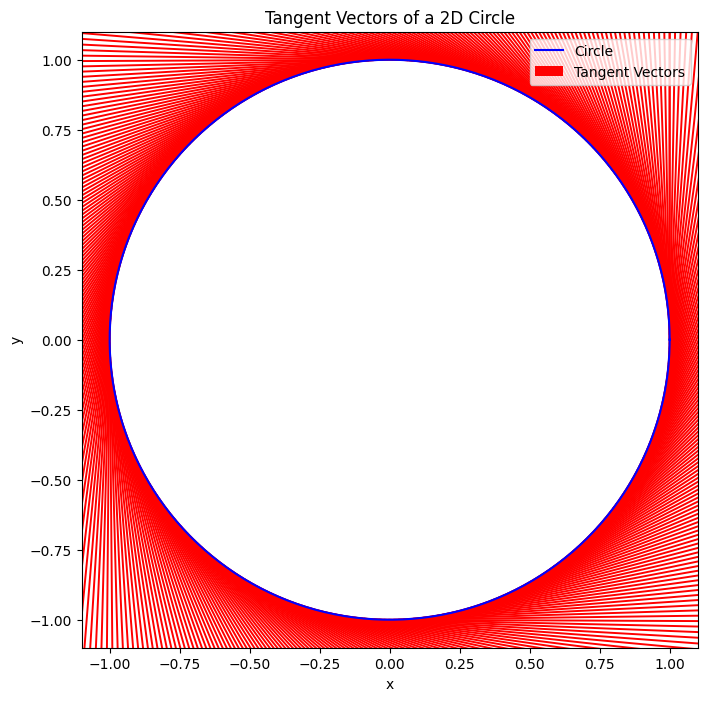

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Circle')
plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
           color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tangent Vectors of a 2D Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


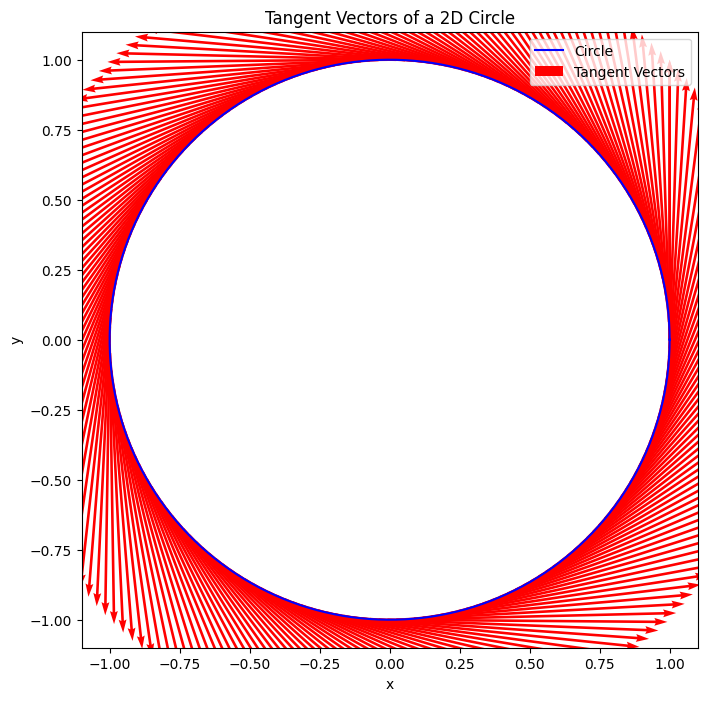

  0%|          | 0/200 [00:00<?, ?it/s]

Infimum: 0.9999688468941562


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

# Define the radius and number of sample points
radius = 1.0
num_samples = 200

# Generate points on the circle
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T

# Calculate the gradient and tangent vectors
gradients = 1 * circle_points
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T


# plt.figure(figsize=(8, 8))
# plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Circle')
# plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
#            color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

# plt.gca().set_aspect('equal', adjustable='box')
# plt.title('Tangent Vectors of a 2D Circle')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()



def find_infimum(data, tangents):
    min_value = float('inf')
    # min_value = 0.0
    num_points = data.shape[0]

    for i in tqdm(range(num_points)):
        for j in range(i+1,num_points):
            x1 = data[i,:]
            # x1 = torch.Tensor(data[i]).view(-1)
            x2 = data[j,:]
            # x2 = torch.Tensor(data[j]).view(-1)

            if np.allclose(x1, x2):
                continue

            diff = x1 - x2
            tangent1 = tangents[i,:]
            tangent2 = tangents[j,:]

            # if np.dot(diff, tangent1) < (1e-6)*np.linalg.norm(diff) and np.dot(diff, tangent2) < (1e-6)*np.linalg.norm(diff):
            # if np.abs(np.inner(diff, tangent1)) < 1e-2 and np.abs(np.inner(diff, tangent2)) < 1e-2:
            if np.abs(cos_sim(diff, tangent1)) < 1e-2 and np.abs(cos_sim(diff, tangent2)) < 1e-2:

                value = 0.5 * np.linalg.norm(diff)

                # if value < 0.1:
                #     # print(value)
                #     print(x1)
                #     print(x2)

                if value < min_value:
                    min_value = value

    return min_value

# Calculate the infimum
infimum = find_infimum(circle_points, tangent_vectors)

print(f'Infimum: {infimum}')


In [ ]:
def generate_training_data(radius, num_samples):
    # Sample points inside and outside the circle
    angles = np.linspace(0, 2 * np.pi, num_samples)
    x = radius * np.cos(angles) + 0.001 * np.random.randn(num_samples)
    y = radius * np.sin(angles) + 0.001 * np.random.randn(num_samples)

    inside_points = np.vstack([x, y]).T
    outside_points = np.random.uniform(-1.5 * radius, 1.5 * radius, (num_samples, 2))

    points = np.vstack([inside_points, outside_points])
    labels = np.hstack([np.ones(num_samples), -np.ones(num_samples)])

    return points, labels

In [ ]:
list_infimums = []


for nun in range(5):


    # Define the radius and number of sample points
    radius = 1.0
    num_samples = 200

    # Generate points on the circle
    angles = np.linspace(0, 2 * np.pi, num_samples)
    # circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T
    circle_points, _ = generate_training_data(radius, num_samples)

    # Calculate the gradient and tangent vectors
    gradients = 1 * circle_points
    tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T


    infimum = find_infimum(circle_points, tangent_vectors)
    list_infimums.append(infimum)



  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
np.array(list_infimums).mean()

0.020020844154990912

In [ ]:
np.array(list_infimums).std()

0.00810393520117218

In [ ]:
list_infimums

[0.028417440623750234,
 0.015979135261596014,
 0.02094942166531865,
 0.006732261659287685,
 0.028025961565001974]

In [ ]:
circle_points[0,:]

array([1., 0.])

In [ ]:
circle_points[1,:]

array([0.99998022, 0.00628943])

In [ ]:
circle_points[0,:]-circle_points[1,:]

array([ 1.97786813e-05, -6.28943332e-03])

In [ ]:
tangent_vectors[0,:]

array([-0.,  1.])

0.006289433316067751

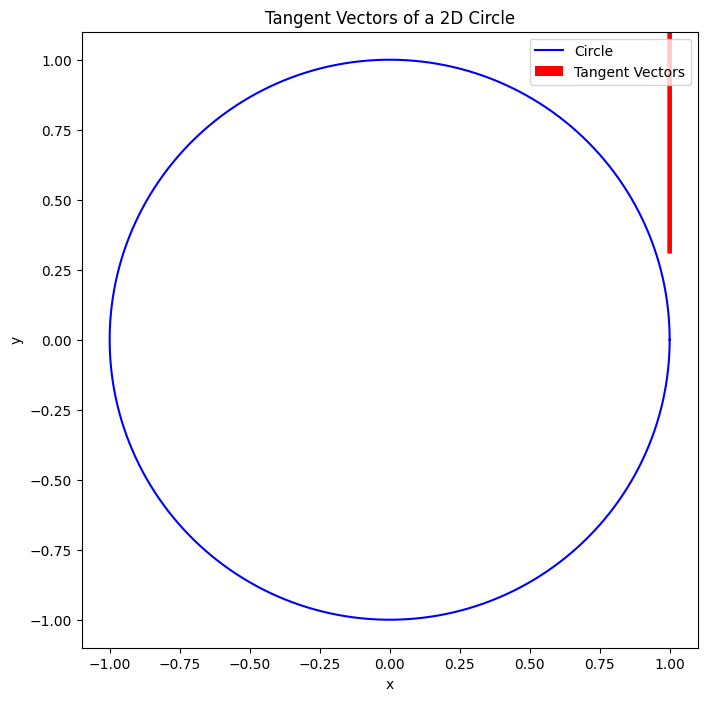

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Circle')
plt.quiver(circle_points[0, 0], circle_points[179, 1], tangent_vectors[0, 0], tangent_vectors[179, 1],
           color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tangent Vectors of a 2D Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import torch

# Define the circle parameters
num_samples = 360
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([np.cos(angles), np.sin(angles)]).T
circle_points_tensor = torch.FloatTensor(circle_points).requires_grad_(True)

# Compute tangent vectors for the unit circle
tangent_vectors = torch.stack([-circle_points_tensor[:, 1], circle_points_tensor[:, 0]], dim=1)

# Function to find infimum
def find_infimum(data, tangents):
    min_value = float('inf')
    num_points = data.shape[0]

    for i in range(num_points):
        for j in range(i + 1, num_points):
            x1 = data[i]
            x2 = data[j]

            if torch.allclose(x1, x2):
                continue

            diff = x1 - x2
            tangent1 = tangents[i,:]
            tangent2 = tangents[j,:]

            if torch.abs(torch.inner(diff, tangent1)) < 1e-5 and torch.abs(torch.inner(diff, tangent2)) < 1e-5:
                value = 0.5 * torch.norm(diff).item()
                if value < min_value:
                    min_value = value

    return min_value

# Calculate the infimum
infimum = find_infimum(circle_points_tensor, tangent_vectors)
print(f'Infimum for the unit circle: {infimum}')


Infimum for the unit circle: inf


In [ ]:
tangent_vectors = np.vstack([-circle_points[:, 1], circle_points[:, 0]]).T

In [ ]:
torch.inner(circle_points_tensor[0, :] - circle_points_tensor[2, :], tangent_vectors[0, :])

tensor(-0.0350, grad_fn=<ViewBackward0>)

In [ ]:
torch.inner(circle_points_tensor[0, :] - circle_points_tensor[179, :], tangent_vectors[0, :])

tensor(-0.0088, grad_fn=<ViewBackward0>)

In [ ]:
torch.inner(circle_points[0, :] - circle_points[179, :], tangent_vectors[179, :])

-0.008750842777064055

In [ ]:
np.linalg.norm(circle_points[0, :] - circle_points[179, :])

1.9999808552295233

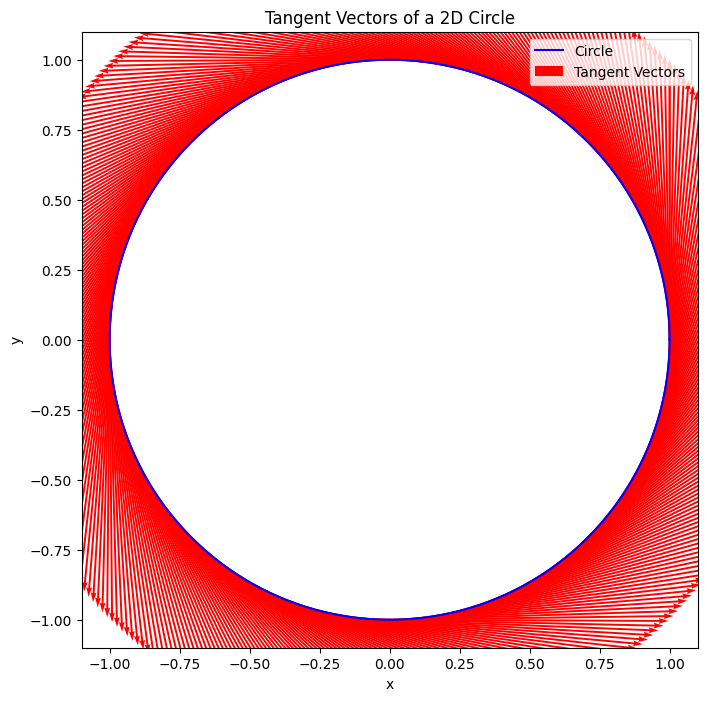

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Circle')
plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
           color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tangent Vectors of a 2D Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
pip install torchdiffeq

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.optimize import minimize
from torchdiffeq import odeint

from tqdm.notebook import tqdm

# Check if CUDA is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Define the neural ODE function
class ODEFunc(nn.Module):
    def __init__(self, input_dim):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )

    def forward(self, t, x):
        return self.net(x)

# Define the ODE Block
class ODEBlock(nn.Module):
    def __init__(self, odefunc):
        super(ODEBlock, self).__init__()
        self.odefunc = odefunc

    def forward(self, x):
        t = torch.tensor([0, 1]).float().to(x.device)
        out = odeint(self.odefunc, x, t)
        return out[1]

# Generate training data for a unit sphere in d dimensions
def generate_training_data(d, num_samples):
    points = np.random.randn(num_samples, d)
    points /= np.linalg.norm(points, axis=1)[:, np.newaxis]
    labels = np.ones(num_samples)

    outside_points = np.random.uniform(-1.5, 1.5, (num_samples, d))
    labels_outside = -np.ones(num_samples)

    points = np.vstack([points, outside_points])
    labels = np.hstack([labels, labels_outside])

    return points, labels

# Function to find infimum
def find_infimum(data, tangents):
    min_value = float('inf')
    num_points = data.shape[0]

    for i in range(num_points):
        for j in range(i + 1, num_points):
            x1 = data[i]
            x2 = data[j]

            if torch.allclose(x1, x2):
                continue

            diff = x1 - x2
            tangent1 = tangents[i]
            tangent2 = tangents[j]

            if torch.norm(torch.matmul(diff, tangent1)) < 1e-6 and torch.norm(torch.matmul(diff, tangent2)) < 1e-6:
                value = 0.5 * torch.norm(diff).item()
                if value < min_value:
                    min_value = value

    return min_value

# Function to find infimum by cossim
def find_infimum_by_cossim(data, tangents):
    min_value = float('inf')
    num_points = data.shape[0]

    for i in range(num_points):
        for j in range(i + 1, num_points):
            x1 = data[i]
            x2 = data[j]

            if torch.allclose(x1, x2):
                continue

            diff = x1 - x2
            tangent1 = tangents[i]
            tangent2 = tangents[j]

            if np.abs(cos_sim(diff, tangent1)) < 1e-2 and np.abs(cos_sim(diff, tangent2)) < 1e-2:
                value = 0.5 * torch.norm(diff).item()
                if value < min_value:
                    min_value = value

    return min_value



# Test for 1D, 3D, 128D, 1024D
dimensions = [1, 3, 128, 1024]
num_samples = 5000

for nun in tqdm(range(5)):
  print(f'\n--- Trial Number: {nun} ---')
  for d in tqdm(dimensions):
      print(f'\n--- {d}D Case ---')

      # Generate data
      points, labels = generate_training_data(d, num_samples)
      points = torch.FloatTensor(points).to(device)
      labels = torch.FloatTensor(labels).unsqueeze(1).to(device)

      # Define and train the model
      odefunc = ODEFunc(d).to(device)
      model = ODEBlock(odefunc).to(device)
      criterion = nn.MSELoss()
      optimizer = optim.Adam(model.parameters(), lr=0.001)

      num_epochs = 1000
      for epoch in range(num_epochs):
          optimizer.zero_grad()
          outputs = model(points)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          if (epoch + 1) % 500 == 0:
              print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

      # Compute tangents
      def compute_tangents(points):
          tangents = []
          num_points, dim = points.shape
          for i in range(num_points):
              point = points[i]
              point = point / torch.norm(point)  # Ensure point is on the unit sphere
              basis = torch.eye(dim).to(device) - torch.ger(point, point)
              u, s, vh = torch.linalg.svd(basis)
              tangents.append(vh[:, 1:])
          return tangents

      tangents = compute_tangents(points)

      # Define functions g_i(x, v) = t_i(x) * v
      def g_i(x, v, i):
          return x[i] * v[i]

      # Compute the partial derivatives of g_i with respect to x and v
      def compute_LM(x, v, model):
          # Calculate ∂f/∂x
          f_x = model(x)
          grad_f = torch.autograd.grad(f_x, x, create_graph=True)[0]

          L_M = []
          for i in range(len(x)):
              g_i_x_v = g_i(x, v, i)
              grad_g_x = torch.autograd.grad(g_i_x_v, x, create_graph=True, retain_graph=True)[0]
              grad_g_v = torch.autograd.grad(g_i_x_v, v, create_graph=True, retain_graph=True)[0]

              # Compute the difference ∂g_i/∂x - ∂g_i/∂v
              grad_diff = grad_g_x - grad_g_v
              L_M.append(grad_diff)

          L_M = torch.stack(L_M)
          return L_M

      # Define the objective function for optimization
      def objective(params, model):
          x = torch.tensor(params[:d], requires_grad=True, dtype=torch.float32).to(device)
          v = torch.tensor(params[d:], requires_grad=True, dtype=torch.float32).to(device)
          L_M = compute_LM(x, v, model)
          determinant = torch.det(L_M)
          return torch.abs(determinant)

      # Initial guess for x and v
      initial_guess = np.random.randn(2 * d)

      # Optimize the objective function
      result = minimize(lambda params: objective(params, model).item(), initial_guess, method='BFGS')

      # Extract the optimal x and v
      x_optimal = result.x[:d]
      v_optimal = result.x[d:]

      # Calculate the norm of v_optimal
      v_norm = np.linalg.norm(v_optimal)

      print(f'Optimal x: {x_optimal}')
      print(f'Optimal v: {v_optimal}')
      print(f'Norm of v: {v_norm}')

      # infimum = find_infimum(points, tangents)
      # print(f'Infimum for the {d}D　unit circle: {infimum}')

      # infimum_cos = find_infimum_by_cossim(points, tangents)
      # print(f'Infimum for the {d}D　unit circle: {infimum_cos}')


Using device: cuda


  0%|          | 0/5 [00:00<?, ?it/s]


--- Trial Number: 0 ---


  0%|          | 0/4 [00:00<?, ?it/s]


--- 1D Case ---
Epoch [500/1000], Loss: 0.9217
Epoch [1000/1000], Loss: 0.9005
Optimal x: [1.19267838]
Optimal v: [1.56387447]
Norm of v: 1.5638744741147625

--- 3D Case ---


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10000, 1])) that is different to the input size (torch.Size([10000, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [500/1000], Loss: 0.2160
Epoch [1000/1000], Loss: 0.1594


RuntimeError: grad can be implicitly created only for scalar outputs